In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# dteday is the only object, so removing dteday from the data
# As there are high values on the instant, casual and registered, so can be considered as redundant 

bike_sharing_new = bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Exploring Data 

In [17]:
# As the more numbers have the numerical values and and less numbers has the categorical values.
bike_sharing_new.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [18]:
bike_sharing_num = bike_sharing_new[['temp','atemp','hum','windspeed','cnt']]
bike_sharing_cat = bike_sharing_new[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

### Visualising the numeric vars

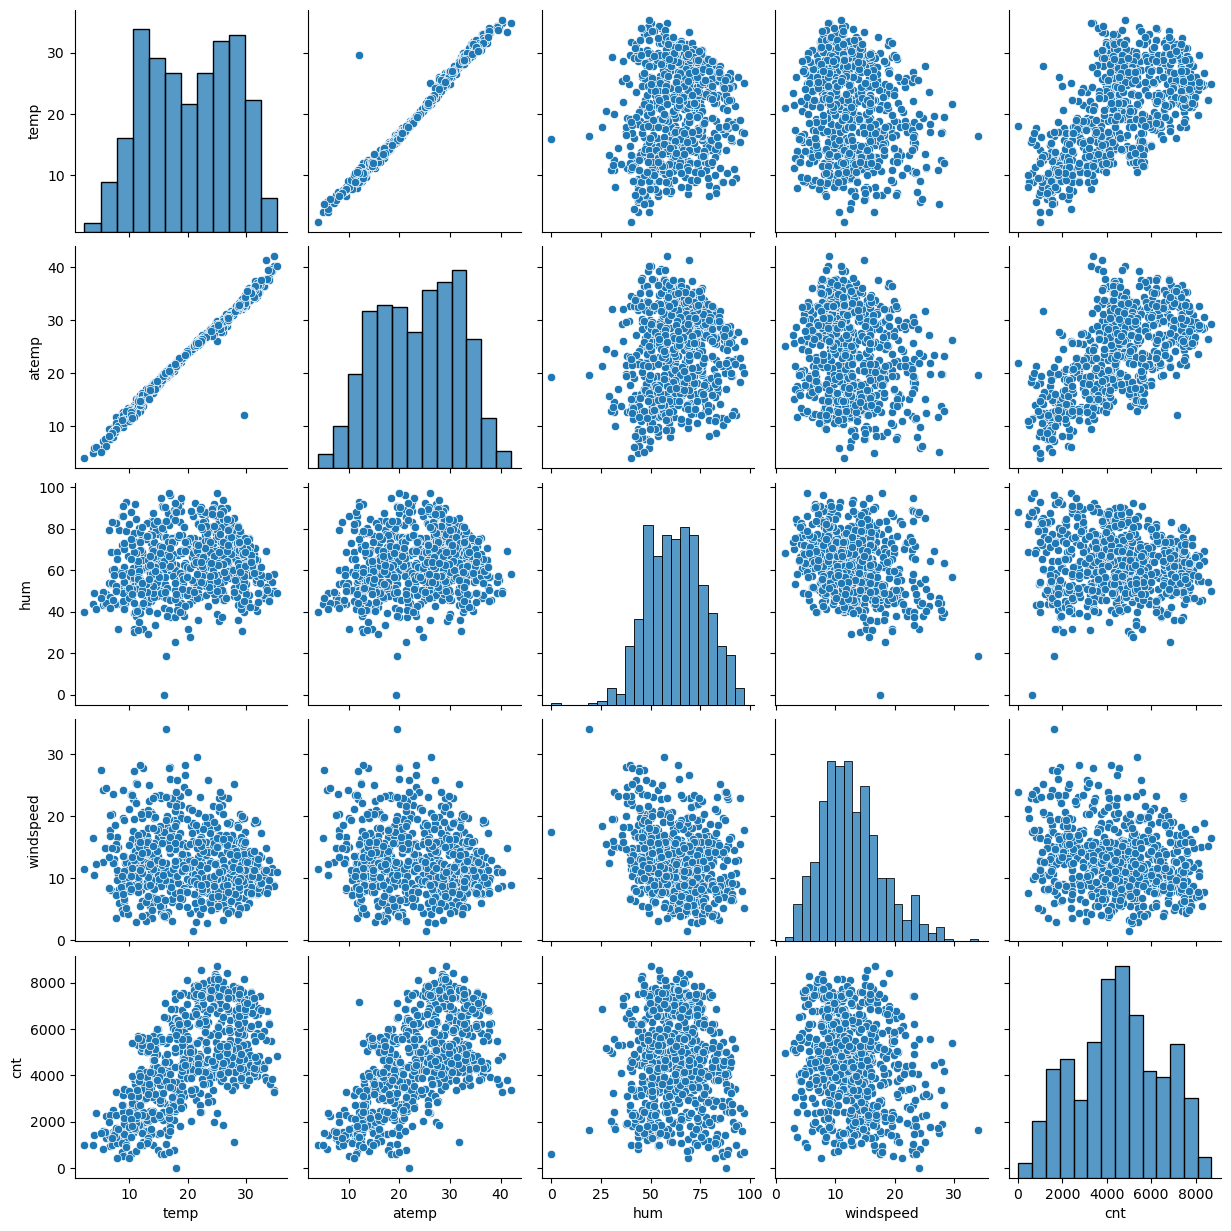

In [20]:
sns.pairplot(bike_sharing_num)
plt.show()

#### Observation

- cnt variable can be mapped through linear regression with temp and atemp
- cnt variable doesn't have any evident relationship with hum and windspeed

### Visualising the numeric vars

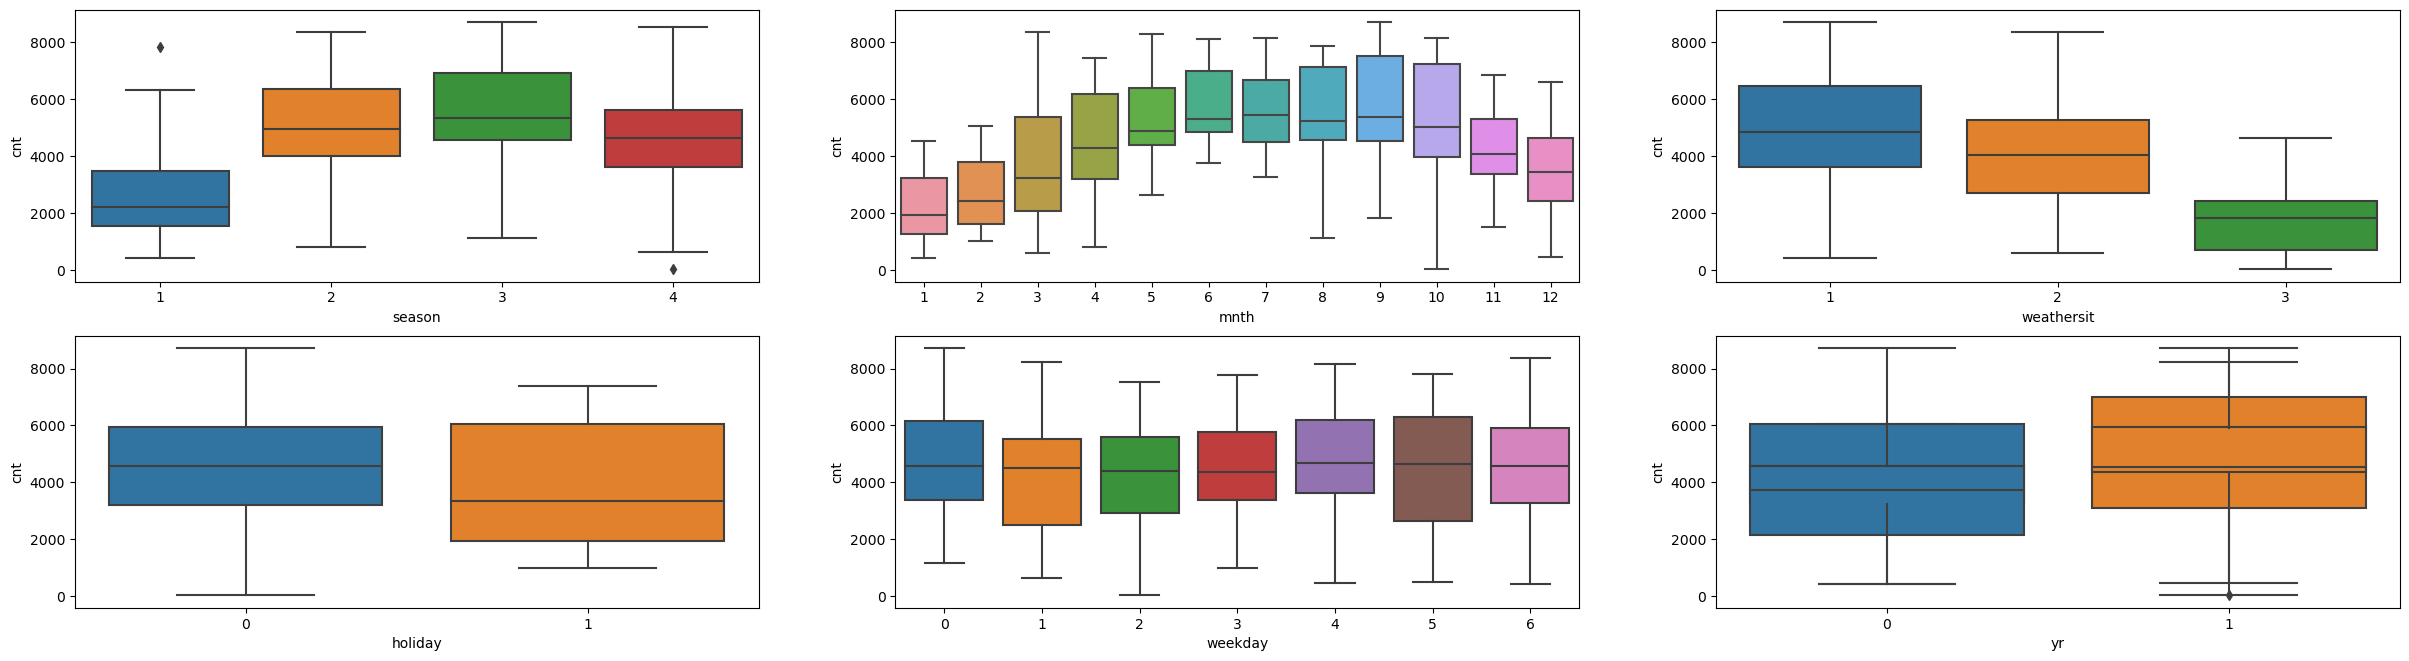

In [28]:
plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_new)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_new)
plt.show()

#### Observation

- Bookings are in order of season 3,2,4,1 - with median booking >5000 for season 3, season definitely has impact on bookings
- Months: 5-10 have comparitively higher booking than the rest, mnth can be a relevant variable for analysis
- weathersit - there is a visible affect on bookings, 1 having highest no of bookings; relevant variable
- holiday - 75th quartile is similar for both cases; maybe a relevant variable
- weekday - Not much difference between individual days, little chances of being a relevant variable
- yr - Not a relevant variable

#### Corelation


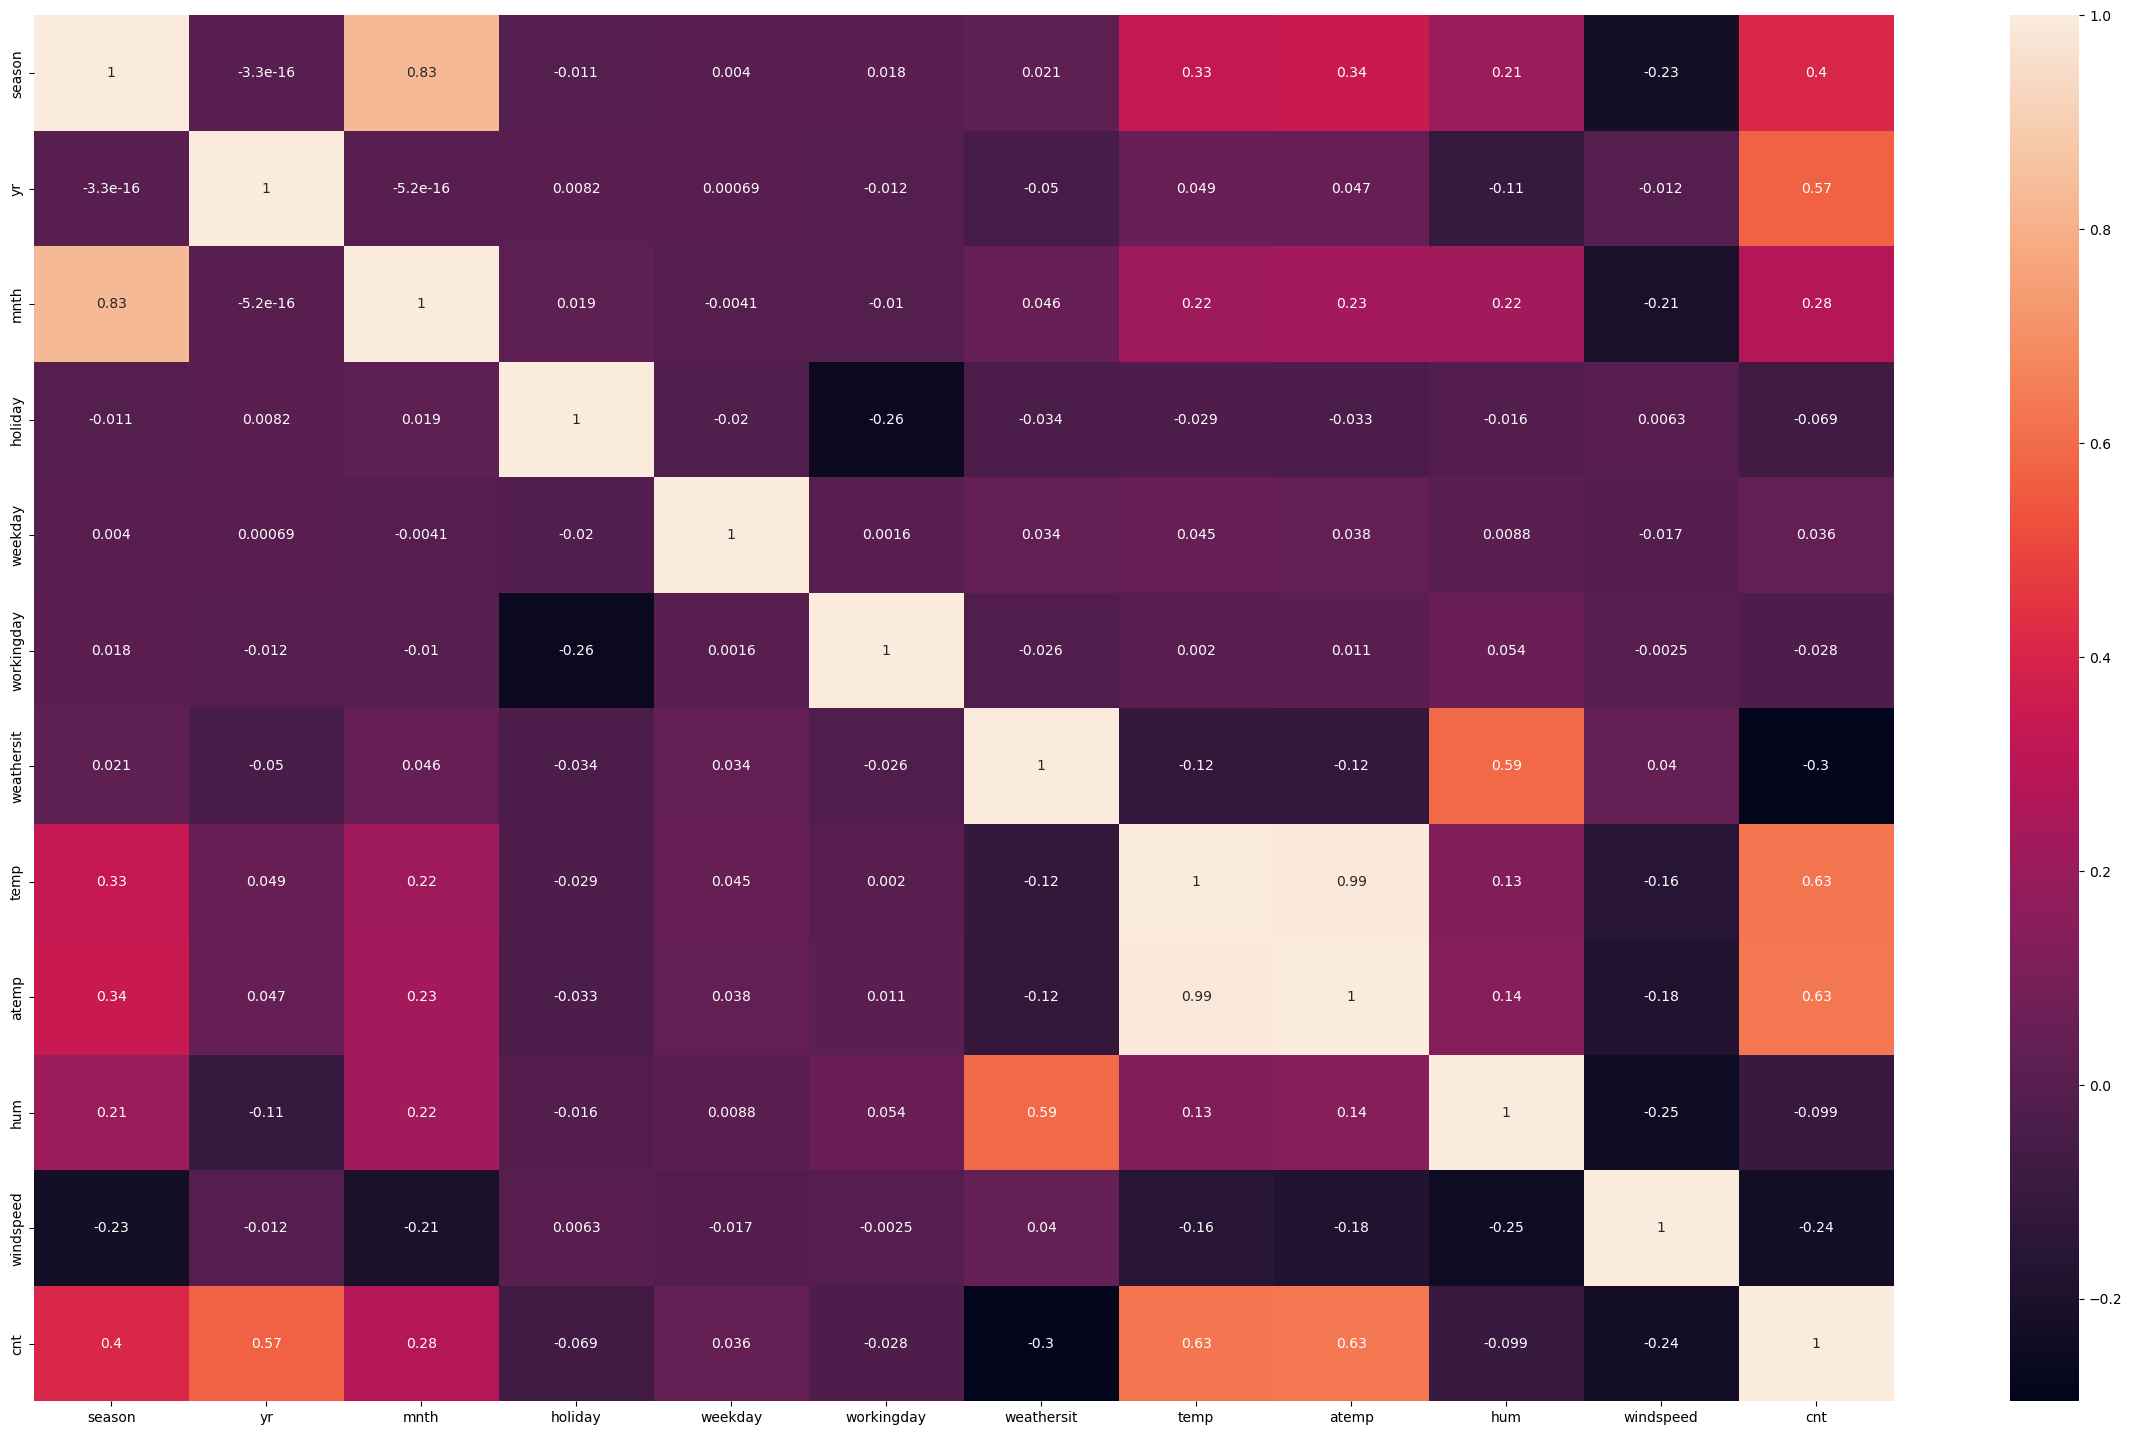

In [33]:
plt.figure(figsize = (30,18))

sns.heatmap(bike_sharing_new.corr(),annot = True)
plt.show()

### Converting numerical variable to categorical variables
- season
- mnth
- weekday
- weathersit

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
bike_sharing_new['season'] = bike_sharing_new['season'].astype('category')
bike_sharing_new['mnth'] = bike_sharing_new['mnth'].astype('category')
bike_sharing_new['weekday'] = bike_sharing_new['weekday'].astype('category')
bike_sharing_new['weathersit'] = bike_sharing_new['weathersit'].astype('category')

In [38]:
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Dummy variables

In [44]:
bike_sharing_new = pd.get_dummies(bike_sharing_new, drop_first=True)
bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [45]:
bike_sharing_new.shape

(730, 30)

In [46]:
## train test split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [51]:
df_train,df_test = train_test_split(bike_sharing_new, train_size = 0.7, random_state = 100)

In [52]:
num_vars=['temp','atemp','hum','windspeed','cnt']

In [53]:
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Linear Regression Model Building

In [65]:
y_train = df_train.pop('cnt')
X_train = df_train

In [66]:
# import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [70]:
# RFE will be used to start model buiilding process
lr = LinearRegression()
lr.fit(X_train, y_train)

# running RFE
rfe = RFE(lr, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [80]:
X_train_RFE = X_train[col]

#### Using statsmodelto build linear regression model

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


- temp and hum too high

### 1st Model

In [91]:
X_train_RFE_lr1 = sm.add_constant(X_train_RFE)

lr1=sm.OLS(y_train, X_train_RFE_lr1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          1.00e-188
Time:                        12:05:48   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- mnth_5 can be noticed highest p-value

### 2nd Model

In [93]:
# Lets remove mnth_5, as it has highest p-value

X_train_new = X_train_RFE.drop('mnth_5',axis=1)
X_train_new_lr2 = sm.add_constant(X_train_new)
lr1=sm.OLS(y_train, X_train_new_lr2).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          2.46e-189
Time:                        12:06:23   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525      0.000       0.179       0.286
yr               0.2298      0.008     28.366      0.000       0.214       0.246
holiday         -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp             0.4965      0.034     14.604      0.000       0.430       0.563
hum             -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed       -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_2         0.1225      0.015      8.137      0.000       0.093       0.152
season_3         0.0361      0.023      1.593      0.112      -0.008       0.081
season_4         0.1502      0.014     10.671      0.000       0.123       0.178
mnth_3           0.0279      0.014      1.931      0.054      -0.000       0.056
mnth_8           0.0505      0.018      2.883      0.004       0.016       0.085
mnth_9           0.1202      0.017      6.946      0.000       0.086       0.154
mnth_10          0.0393      0.018      2.231      0.026       0.005       0.074
weathersit_2    -0.0544      0.010     -5.199      0.000      -0.075      -0.034
weathersit_3    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now season_3 can be noticed highest p-value

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.53
7,season_4,3.05
12,weathersit_2,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.63


- temp and hum is also high

### 3rd Model

In [97]:
X_train_1 = X_train_new.drop('season_3', axis = 1)
X_train_1_lr3 = sm.add_constant(X_train_1)
lr3 = sm.OLS(y_train,X_train_1_lr3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          5.94e-190
Time:                        12:07:50   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525      0.000       0.179       0.286
yr               0.2287      0.008     28.289      0.000       0.213       0.245
holiday         -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp             0.5371      0.023     23.855      0.000       0.493       0.581
hum             -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed       -0.1893      0.026     -7.388      0.000      -0.240      -0.139
season_2         0.1059      0.011      9.743      0.000       0.085       0.127
season_4         0.1393      0.012     11.304      0.000       0.115       0.163
mnth_3           0.0233      0.014      1.642      0.101      -0.005       0.051
mnth_8           0.0605      0.016      3.699      0.000       0.028       0.093
mnth_9           0.1292      0.016      7.897      0.000       0.097       0.161
mnth_10          0.0355      0.017      2.032      0.043       0.001       0.070
weathersit_2    -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weathersit_3    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now mnth_3 can be noticed the highest p-value

### 4th Model

In [98]:
X_train_2 = X_train_1.drop('mnth_3',axis=1)
X_train_2_lr4 = sm.add_constant(X_train_2)
lr4 = sm.OLS(y_train,X_train_2_lr4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          1.49e-190
Time:                        12:08:00   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838      0.000       0.186       0.292
yr               0.2289      0.008     28.264      0.000       0.213       0.245
holiday         -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp             0.5316      0.022     23.836      0.000       0.488       0.575
hum             -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed       -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_2         0.1058      0.011      9.719      0.000       0.084       0.127
season_4         0.1353      0.012     11.180      0.000       0.112       0.159
mnth_8           0.0585      0.016      3.583      0.000       0.026       0.091
mnth_9           0.1277      0.016      7.803      0.000       0.096       0.160
mnth_10          0.0358      0.018      2.046      0.041       0.001       0.070
weathersit_2    -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weathersit_3    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p-value is less than 0.05 for all variables in model 4, hum has very high VIF, we may remove it and re-examine the model

### 5th Model

In [101]:
X_train_3 = X_train_2.drop('hum',axis=1)
X_train_3_lr5 = sm.add_constant(X_train_3)
lr5 = sm.OLS(y_train,X_train_3_lr5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          9.45e-187
Time:                        12:08:22   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014      0.000       0.102       0.168
yr               0.2329      0.008     28.281      0.000       0.217       0.249
holiday         -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp             0.5099      0.022     22.823      0.000       0.466       0.554
windspeed       -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_2         0.1026      0.011      9.237      0.000       0.081       0.124
season_4         0.1266      0.012     10.345      0.000       0.103       0.151
mnth_8           0.0569      0.017      3.406      0.001       0.024       0.090
mnth_9           0.1208      0.017      7.245      0.000       0.088       0.154
mnth_10          0.0311      0.018      1.741      0.082      -0.004       0.066
weathersit_2    -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit_3    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- mnth_10 has a high p-value. Let's try to remove that and examine again.

### 6th Model

In [102]:
X_train_4 = X_train_3.drop('mnth_10',axis=1)
X_train_4_lr6 = sm.add_constant(X_train_4)
lr6 = sm.OLS(y_train,X_train_4_lr6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          2.62e-187
Time:                        12:08:30   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p-value under control for all of them, let's check VIF.

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.49
5,season_4,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


- VIF also in acceptable range so 6th model can be considered.

### Model Interpretations

- 1. Null hypothesis is rejected

H0: All co-efficients are NIL; no linear regression present
H1: Atleast one varible has non-zero co-efficient; Linear regression is present

Result - All variables in model 6 have non-zero co-efficent, thus NULL Hypothesis is rejected.

- 2. Model is significant - F statistics is the indicator of model significance which is acceptable as it's a large number

#### Residual Analysis

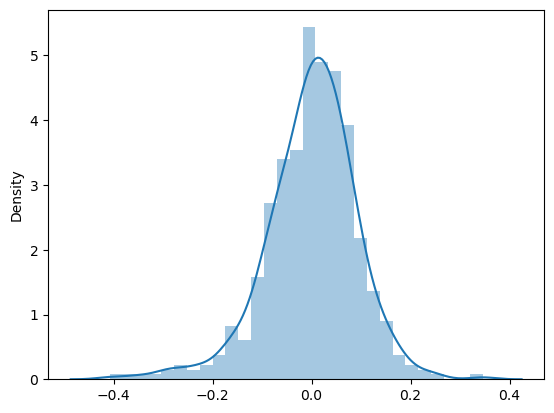

In [111]:
y_train_cnt = lr6.predict(X_train_4_lr6)
res = y_train-y_train_cnt
sns.distplot((res))
plt.show()

- Its a well distributed bell curve hence, we may interpret that error terms are normally distributed with mean = 0
- Let us now try the model on the test set.

In [112]:
num_vars=['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [114]:
y_test = df_test.pop('cnt')
X_test = df_test

In [115]:
col = X_train_4.columns
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [116]:
X_test_1 = X_test[col]

In [118]:
X_test_lr6 = sm.add_constant(X_test_1)

#### Prediction

In [124]:
y_pred = lr6.predict(X_test_lr6)

#### Model Evaluation

In [125]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7836774771099584